<a href="https://colab.research.google.com/github/koichi-inoue/JupyterNotebook/blob/master/MultipleRegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 重回帰分析

## Wine Quality Data Set の赤ワインのデータセットを読み込み

In [1]:
!wget http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv

--2020-07-16 08:44:24--  http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv
Resolving pythondatascience.plavox.info (pythondatascience.plavox.info)... 3.114.196.101, 52.69.24.94
Connecting to pythondatascience.plavox.info (pythondatascience.plavox.info)|3.114.196.101|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv [following]
--2020-07-16 08:44:24--  https://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv
Connecting to pythondatascience.plavox.info (pythondatascience.plavox.info)|3.114.196.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/octet-stream]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   515KB/s    in 0.2s    

2020-07-16 08:44:25 (515 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



## データフレームに読み込み

In [10]:
import pandas as pd

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# 説明変数（密度と揮発酸）
X = df[['density', 'volatile acidity']]
x1 = df[['density']]
x2 = df[['volatile acidity']]

# 目的変数（アルコール度数）
y = df[['alcohol']]

print(X.shape)
print(y.shape)

(1599, 2)
(1599, 1)


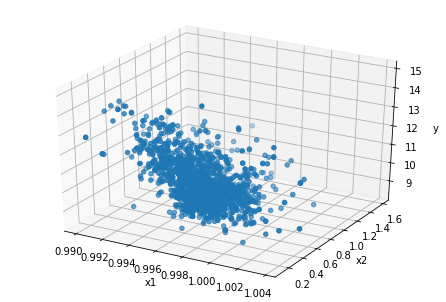

In [12]:
# x1, x2, y を３次元プロット
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()

## 正規化なしの重回帰分析

### 重回帰分析｜正規化なし｜学習

In [13]:
# ライブラリの読み込み
from sklearn.linear_model import LinearRegression
import numpy as np

# 学習
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 結果の視覚化

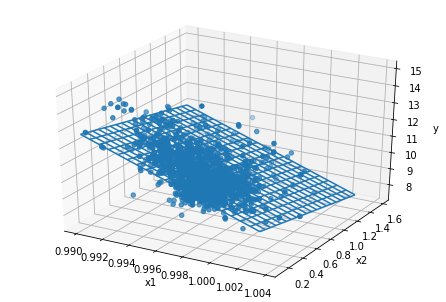

偏回帰係数 [[-277.78274856   -1.13941954]]
切片 [287.90342428]
決定係数 0.28283042699952954


In [14]:
# 平面 を３次元プロット
fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

mesh_x1 = np.arange(x1.min()[0], x1.max()[0], (x1.max()[0]-x1.min()[0])/20)
mesh_x2 = np.arange(x2.min()[0], x2.max()[0], (x2.max()[0]-x2.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = model.coef_[0][0] * mesh_x1 + model.coef_[0][1] * mesh_x2 + model.intercept_[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.show()

print('偏回帰係数', model.coef_)
print('切片', model.intercept_)
print('決定係数', model.score(X, y))

### 予測

In [30]:
# 元データをモデルに当てはめた予測
model.predict(X)

array([[ 9.93420409],
       [10.00689132],
       [10.08806511],
       ...,
       [10.72292626],
       [10.64410597],
       [11.02025586]])

----

## 正規化ありの重回帰分析

### 正規化

In [22]:
from sklearn import preprocessing

# 分散を使った正規化
sscaler = preprocessing.StandardScaler()
sscaler.fit(X)
Xss = sscaler.transform(X) 
sscaler.fit(y)
yss = sscaler.transform(y)

print('説明変数の正規化')
print(Xss)
print('目的変数の正規化')
print(yss)

説明変数の正規化
[[ 0.55827446  0.96187667]
 [ 0.02826077  1.96744245]
 [ 0.13426351  1.29706527]
 ...
 [-0.53355375 -0.09955388]
 [-0.67665745  0.65462046]
 [-0.66605717 -1.21684919]]
目的変数の正規化
[[-0.96024611]
 [-0.58477711]
 [-0.58477711]
 ...
 [ 0.54162988]
 [-0.20930812]
 [ 0.54162988]]


In [23]:
# 説明変数 平均 0 の確認
Xss.mean()

1.190903397021306e-14

In [25]:
# 説明変数 標準偏差１の確認
Xss.std()

1.0

In [26]:
# 目的変数 平均 0 の確認
yss.mean()

1.0664806540489309e-16

In [27]:
# 目的変数 標準偏差１の確認
yss.std()

1.0

### 重回帰分析｜正規化あり｜学習

In [29]:
# 学習
model_std = LinearRegression()
model_std.fit(Xss, yss)

print('標準化偏回帰係数', model_std.coef_)
print('切片', model_std.intercept_)
print('決定係数',model_std.score(Xss, yss))

標準化偏回帰係数 [[-0.49196281 -0.19145194]]
切片 [1.1769986e-14]
決定係数 0.28283042699952887


### 予測

In [31]:
# モデルに当てはめた予測
model_std.predict(Xss)

array([[-0.45880343],
       [-0.39057392],
       [-0.31437831],
       ...,
       [ 0.28154838],
       [ 0.20756194],
       [ 0.56064349]])

データが正規化されている場合、当然、本来求めたい値と結果が異なります。
この場合、正規化する前のモデルで逆変換して戻す必要があるので、scikit-learn のinverse_transform を用いて逆変換を行って確認します。


In [32]:
# 予測を正規化前の状態で表示
sscaler.inverse_transform(model_std.predict(Xss))

array([[ 9.93420409],
       [10.00689132],
       [10.08806511],
       ...,
       [10.72292626],
       [10.64410597],
       [11.02025586]])